#### Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Задача:  
### Нужно выявить закономерности в видео-играх, которые больше всего влияют на их успешность . На основе этих данных мы сможем спланировать рекламную кампанию на следующий год, сделав ставку на более успешный продукт.

### 1. Откроем наш датасет

In [1]:
import pandas as pd
df = pd.read_csv('../notebook for github/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2. Предобработка данных:

#### 2.1 Заменим названия столбцов на менее короткие (удобные) и с нижним регистром

In [3]:
df.columns = ['name', 'platform', 'year', 'genre', 'na_sl', 'eu_sl',
       'jp_sl', 'other_sl', 'critic', 'user', 'rating']

#### 2.1 Разберемся с пропусками

In [4]:
df.isna().sum() #пропуски по столбцам

name           2
platform       0
year         269
genre          2
na_sl          0
eu_sl          0
jp_sl          0
other_sl       0
critic      8578
user        6701
rating      6766
dtype: int64

1. Пропуски в колонке с оценкой критиков я трогать не буду, т.к. заменять рейтинг на среднее или нули точно не лучшее решение. Попробовать угадать рейтинг используя данные других колонок тоже вряд ли будет правильным, т.к. рейтинг двух игр одного жанра, на одной платформе и одинаково успешные по продажам, могут кардинально различаться. Столбец имеет числовой тип данных (float), поэтому проводить с ним мат. операции мы можем.


2. Столбец с оценками пользователей имеет строчный тип данных (object). Для того, чтобы можно было проводить с ним различные математические опреции, надо перевести его в численный тип данных, а для этого надо заменить значения "NaN" и "tbd" на числа. Аббревиатура  "tbd" означает, что оценка еще не проставлена. Конечно заменять эти значения на нули не совсем правильно, т.к. это исказит среднее значение по столбцу, но пока я оставлю это так, далее, при проверке гипотез, заменю нули на среднее по исследуемым платформам и жанрам.

In [5]:
df['user'] = df['user'].fillna(0) # пропуски на нули
df['user'] = df['user'].replace('tbd', '0') # tbd на нули
df['user'] = df['user'].astype('float') # меняем тип на float

Приведем столбец с отзывами пользователей в 100-бальную систему

In [6]:
df['user'] = df['user']*10

3. Добавим столбец с суммарными продажами по всем регионам

In [7]:
df['sum_sl'] = df['na_sl'] + df['eu_sl'] + df['jp_sl']

4. Столбец с рейтингом оставлю без изменений

### ВЫВОД: Много пропосков в столбцах с оценками и рейтингом. Игр очень много, возможно отсутствие оценок как критиков, так и позьзователей обусловленно небольшим интересом к игре и соответственно малым количеством (или полным отсутствием) оценок, для того чтобы в наш датасет могла попасть средняя оценка. Это также могут быть игры на очень редких платформах, или очень старые игры, когда оставлять оценки в сети просто не представлялось возможным, либо просто не было в порядке вещей. В любом случае пропуски удалять нельзя, т.к. можно потерять половину всех данных.

### 3. Исследовательский анализ данных

In [8]:
df.head()

,name,platform,year,genre,na_sl,eu_sl,jp_sl,other_sl,critic,user,rating,sum_sl
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,30.38


#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [9]:
year_game_count = df.groupby('year')['name'].count().reset_index() #группируем по годам, выводим кол-во игр и преобразуем в табличку
year_game_count.head()

,year,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


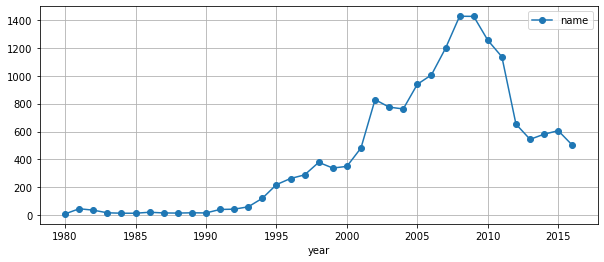

In [10]:
year_game_count.plot(x='year', y='name', style='o-', grid=True, figsize=(10,4))

1. C 1980 по 1993 г. выходило не более 50 игр в год, что довольно мало по современным меркам. Конечно это связано с невысоким уровнем развития цифровых технологий и видео-игр в частности
2. 1994 г. является переломным моментом и точкой отсчета, когда график идет на взлет. Конечно это связано с релизом в 1994 году новой игровой платформы Playstation One.
3.  Следующий взлет 2001 - 2002 года. На рынок выходят Playstation 2 и новая приставка от microsoft - Xbox
4.  В 2006 году начинается новый скачок по количеству новых релизов, связанный конечно с релизом новых игровых консолей Playstation 3, Xbox 360 и Nintendo Wii. Это пожалуй начало самого мощного и стремительного прорыва в истории видеоигр, если судить по нашему графику.
5. Далее мы видим, что пик по кол-ву релизов приходится на 2008 год, после чего резко идет на спад. Такое падение можно связать со всемирным экономическим кризисом 2008 года. В этот период на ближайшие 5 лет (2008-2012) экономика находилась не в лучшем состоянии, покупательская способность населения снижалась, в следствие чего на рынок поступало меньше предложения, как в плане самих консолей, так и в плане новых игр, что нам наглядно демонстрирует наш график.
6. 2013 год. Экономическое положение в мире становится более устойчивым после потрясений 2008 года. Соответственно Sony вместе с microsoft презентуют свои новые консоли - Playstation 4 и Xbox One. Но таких мощных взлетов по кол-ву новых игровых релизов мы уже не видим, почти на 60% меньше (600 против 1400) чем в 2008 году.
7. Как интересно получается, что на примере игровой индустрии можно посмотреть не только то, как на нее влияли конкретные факторы "по теме" (цифровое развитие, релизы новых консолей), но и в целом экономическое положение в мире. Можно заметить, что после появления последних консолей (2013 г.) уровень количества новых игр выпускаемых на рынок упал до уровня 2001 года.

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [11]:
platform_sum_sl = df.groupby('platform')['sum_sl'].sum().reset_index() #группируем по платформам, выводим сумму продаж и преобразуем в табличку
platform_sum_sl.sort_values('sum_sl', ascending=False).head(10) #Выведем ТОП-10 платформ по продажам и отсортируем по убыванию

,platform,sum_sl
16,PS2,1062.33
28,X360,885.66
26,Wii,828.44
17,PS3,803.97
4,DS,746.86
15,PS,689.95
6,GBA,310.12
18,PS4,265.79
19,PSP,252.63
29,XB,249.02


#### Оставим таблицу только с ТОП-10 платформ

In [12]:
platform_top_10 = df.query('platform == ["PS2","X360","Wii", "PS3", "DS", "PS", "GBA", "PS4", "PSP", "XB"]')

#### Сделаем сводную таблицу. Суммарные продажи по платформам и по годам. Постоим график

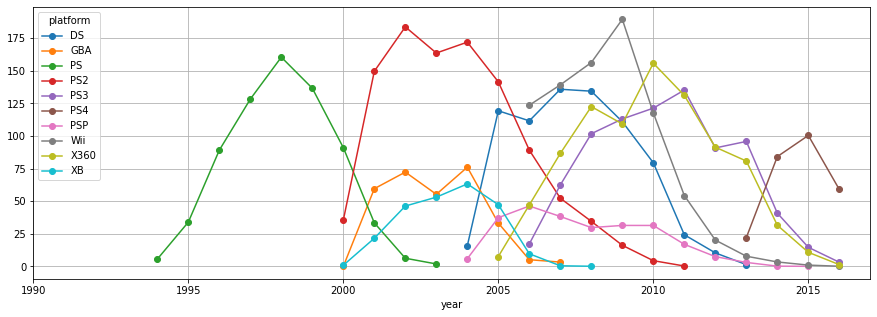

In [13]:
platform_top_10.pivot_table(index='year', columns='platform', values='sum_sl', aggfunc='sum').plot(
    style='o-', grid=True, figsize=(15, 5), xlim=(1990, 2017)
)

Получилось не очень наглядно, но всё же из данного графика можно вытащить следующие закономерности:
1. Новая приставки от Sony появляется примерно каждые 6-7 лет. Кстати в 2020 году выходи Playstation 5, а значит этот промежуток работает)
2. Время жизни приставок Playstation примерно 10 лет.
3. Приставки microsoft появляются в промежуток - раз в 5-8 лет.
4. Время жизни приставок microsoft также примерно 10 лет.
5. Появляются и исчезают они примерно в одно и тоже время.
7. Nintendo Wii выделяется мощным пиком по продажам игр, действительно, в своё время эта штука наделала много шума своим революционным механизмом, но скатилась не менее быстро, как мы видим :)
6. К 2016 году исчезли практически все приставки из нашего ТОП-10, а следовательно, для дальнейшего анализа, мы не будем брать данные до 2016 года. Хотя лучше взять 2014-2016 года, чтобы было побольше данных по актуальным платформам, только они будут значимы для подготовки стратегии на 2017 год.

#### Оставим данные только за 2015 - 2016 год.

In [14]:
df_new = df.query('year == ["2014","2015","2016"]')
df_new.head()

,name,platform,year,genre,na_sl,eu_sl,jp_sl,other_sl,critic,user,rating,sum_sl
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,0.0,NaN,12.25
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,10.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,0.0,NaN,10.94
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,7.30
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,0.0,NaN,6.70


In [15]:
df_new['platform'].value_counts() #какие платформы актуальны с 2014 - 2016

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

1. Не берем в расчет PS3, X360, PSP, Wii, т.к. это "списанные платформы", оставим датасет без них:

In [16]:
df_new = df_new.query('platform == ["PS4", "PSV", "XOne", "3DS", "PC", "WiiU"]')
df_new.head()

,name,platform,year,genre,na_sl,eu_sl,jp_sl,other_sl,critic,user,rating,sum_sl
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,0.0,NaN,12.25
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,10.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,0.0,NaN,10.94
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,7.30
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,0.0,NaN,6.70


#### 3.3 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

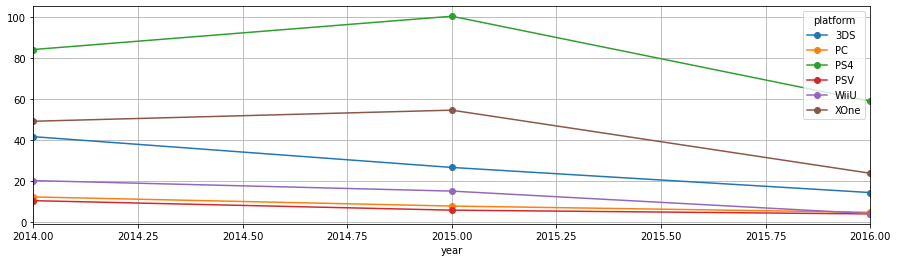

In [17]:
df_new.pivot_table(index='year', columns='platform', values='sum_sl', aggfunc='sum').plot(
    style='o-', grid=True, figsize=(15, 4), xlim=(2014, 2016))

1. Безусловный лидер продаж - это PS4, далее XOne и 3DS (неожиданно).
2. Чтобы понять перспективность платформы, то надо сравнивать 14 год с 15-м, сравнивать 15-й с 16-м некорректо, т.к. 16 год неполный и получается, как будто все платформы "падают")

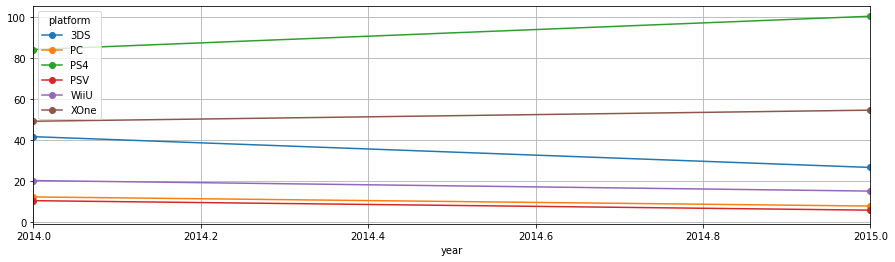

In [18]:
df_new.pivot_table(index='year', columns='platform', values='sum_sl', aggfunc='sum').plot(
    style='o-', grid=True, figsize=(15, 4), xlim=(2014, 2015))

Ладно, оставлю для анализа 3 платформы PS4, XOne и 3DS (несмотря на отрицательную динамику это всё равно прибыльнее и перспективнее, чем остальное)

#### 3.4 Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

In [19]:
import matplotlib.pyplot as plt

(0.0, 1.5)

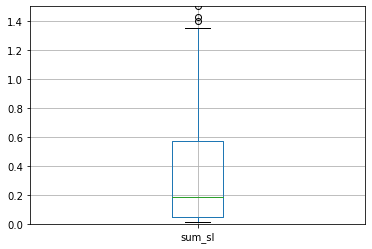

In [20]:
df_new.query('platform == "XOne"').boxplot(column='sum_sl') #оставляем только XOne и строим ящик по продажам каждой игры
plt.ylim(0, 1.5)

(0.0, 1.5)

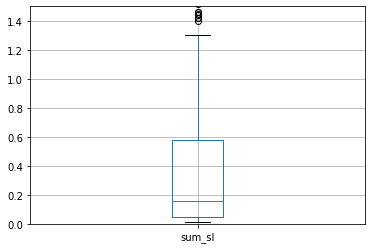

In [21]:
df_new.query('platform == "PS4"').boxplot(column='sum_sl') #оставляем только PS4 и строим ящик по продажам каждой игры
plt.ylim(0, 1.5)

(0.0, 0.6)

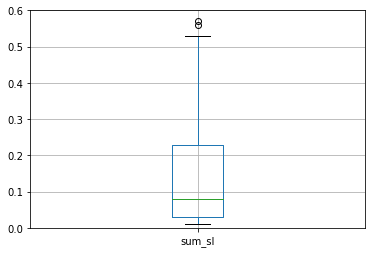

In [22]:
df_new.query('platform == "3DS"').boxplot(column='sum_sl') #оставляем только 3DS и строим ящик по продажам каждой игры
plt.ylim(0,0.6)

 1. Мы видим, что диаграммы размаха у PS4 и Xbox One практически идентичны, большая часть игр (75%) приносят не более 600 000 тыс долл. c релиза на обоих платформах. Медианы примерно равны.
 2. С 3DS ситуация уже гораздо хуже, большая часть игр (75%) приносят не более 230 000 т.д. с релиза, что почти в 3 раза меньше, чем с полноценных консолей (3DS - портативная консоль)

#### Посчитаем средние продажи на платформах.

In [23]:
df_new.query('platform == "PS4"')['sum_sl'].mean()

0.6480585106382979

In [24]:
df_new.query('platform == "XOne"')['sum_sl'].mean()

0.5607017543859648

In [25]:
df_new.query('platform == "3DS"')['sum_sl'].mean()

0.3915094339622642

1. Интересный факт, что медиана у XOne немного больше, чем у PS4, а вот среднее наоборот больше у PS4, это значит, что у PS4, есть "массивные" выбросы или, как можно сказать по другому, более кассово успешные релизы, но не намного больше). Разница средних значений  двух платформ по сборам с продаж игр 12%
2. 3DS отстает от лидера на 39%, разница ощутимая, но не такая сильная, как может показаться после ящика с усами, там разница в медианах - 50% и большая часть продаж (75%) ниже почти в 3 раза по сравнению с PS4. А это значит, что у 3DS всё таки есть "сильные" релизы, которые подтягивают среднее значение вверх

#### 3.5 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


In [26]:
df_new_ps4 = df_new.query('platform == "PS4"') #фильтр по PS4

In [27]:
df_new_ps4['sum_sl'].corr(df_new_ps4['critic']) #корреляция продаж от оценок критиков

0.4021203477635432

In [28]:
df_new_ps4['sum_sl'].corr(df_new_ps4['user']) #корреляция продаж от оценок пользователей

0.10069328498944413

1. Мы видим положительную корреляцию продаж от оценок критиков, не очень большую, но всё же положительная зависимость есть
2. Корреляции продаж от оценок критиков практически нет, скорее всего это связано с тем, что мы заменили много пропусков на нули в этом столбце, попробуем заменить нули на среднее значение и посмотреть на корреляцию еще раз.

In [29]:
ps4_user_mean = df_new_ps4['user'].mean() #среднее по столбцу
df_new_ps4['user'] = df_new_ps4['user'].replace(0, ps4_user_mean) #замена нулей на среднее

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df_new_ps4['sum_sl'].corr(df_new_ps4['user']) #корреляция продаж от оценок пользователей

0.062424582723993365

#### 1. Корреляция стала еще меньше). Не буду копать глубже, сделаю вывод, что на платформе PS4 продажи не зависят от оценок пользоватлей прям совсем, а вот от оценок критиков зависят, чем выше отзывы, тем больше продажи, корреляция положительная, но не очень сильная, чтобы утверждать, что эта зависимость прямая.

#### Посмотрим на графики рассеивания

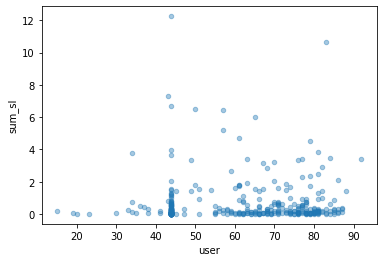

In [31]:
df_new_ps4.plot(x='user', y='sum_sl', kind='scatter', alpha=0.4)

1. На графике положительная корреляция от оценок пользователей просматривается более наглядно. Мы видим, что основная масса более высоких продаж приходится на более высокие оценки, но также мы видим, что есть выбросы в районе оценок 40-50, видимо они и гасят коэф-т корреляции в 0. Если убрать выбросы (продажи более 600к) то корреляция будет более сильная, положительная.

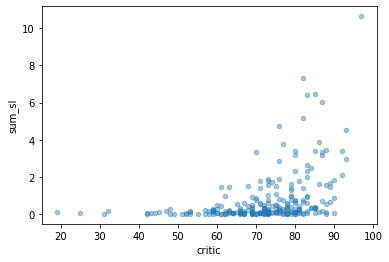

In [32]:
df_new_ps4.plot(x='critic', y='sum_sl', kind='scatter', alpha=0.4)

1. Здесь всё ожидаемо, основная масса продаж распределена в районе оценок 60-90 и рост продаж растет только с увеличением оценок. Это видно наглядно, зависимость положительная!

#### 3.6 Соотнесите выводы с продажами игр на других платформах

In [33]:
df_new_xone = df_new.query('platform == "XOne"') #фильтр по XOne
df_new_3ds = df_new.query('platform == "3DS"') #фильтр по XOne

1. Корреляция на платформе XOne

In [34]:
print(df_new_xone['sum_sl'].corr(df_new_xone['critic'])) #корреляция продаж от оценок критиков
print(df_new_xone['sum_sl'].corr(df_new_xone['user'])) #корреляция продаж от оценок пользователей

0.4286498963779636
0.10235537227566903


1. Корреляция на платформе 3DS

In [35]:
print(df_new_3ds['sum_sl'].corr(df_new_3ds['critic'])) #корреляция продаж от оценок критиков
print(df_new_3ds['sum_sl'].corr(df_new_3ds['user'])) #корреляция продаж от оценок пользователей

0.3117520311601231
0.05301368197221301


#### Если не сильно цепляться к цифрам, то можно сделать вывод, что на всех платформах корреляции продаж от оценок примерно одинаковые. Небольшая положительная зависимость продаж от оценок критиков, и практическо полное отсутствие взаимосвязи продаж от оценок пользователей

#### 3.7 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


1. Сгруппируем данные по жанрам и посчитаем кол-во игр и продаж в каждом жанре.

In [36]:
df_new.groupby('genre')['sum_sl'].agg(['sum', 'count']).sort_values('count', ascending=False)

,sum,count
genre,,
Action,148.36,495
Role-Playing,84.38,187
Adventure,12.06,148
Sports,67.51,104
Shooter,126.73,99
Misc,23.81,89
Racing,22.28,53
Simulation,11.53,40
Fighting,22.27,38


2. Построим график распределения

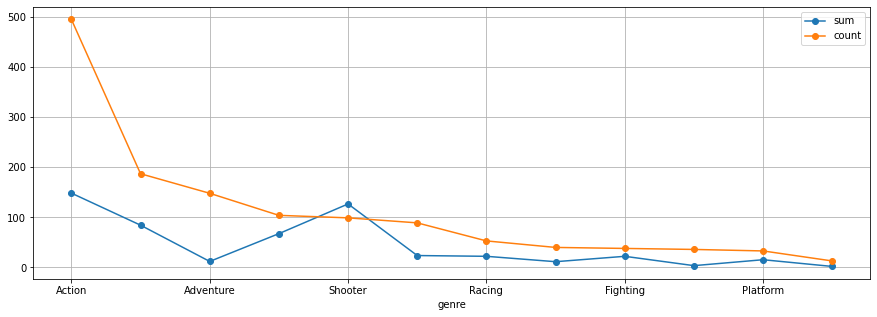

In [37]:
df_new.groupby('genre')['sum_sl'].agg(['sum', 'count']).sort_values('count', ascending=False).plot(
    style='o-', grid=True, figsize=(15, 5))

#### О прибыльности жанра конечно нужно судить по соотношению кол-ва игр и суммы продажам, если просто судить по сумме продаж, то мы можем ввести себя в заблуждение и сделать неправильный вывод.

#### Проанализируем наш график и сделаем выводы:
1. Больше всего продаж в жанре Экшен, но и кол-во игр в этом жанре гораздо больше чем в остальных. Можно ли отнести этот жанр к прибыльным, спорный вопрос, но мы будем держать его ввиду, что ставку делать на него определенно можно.
2. Заметно выделяется на графике жанр - Шутер, любимые всеми стрелялки. Однозначны лидер, релизов почти в 5 раз меньше, чем у экшенов, а прибыль практически одинаковая.
3. Также к успешным могу отнести еще жанр Спорт и Role-Playing.
4. Антилидеры - это Adventure и Misc, релизов относительно много, а прибыли мало
5. Остальные жанры идут примерно ровно, небольшое кол-во релизов и небольшое кол-во прибыли соответственно, мы не будем их рассматривать!

Итого мой ТОП-4 жанров, на которые определенно надо делать ставку:
1. Shooter
2. Sports
3. Role-Playing	
4. Action

#### Мне стало интересно, действительно ли так успешен жанр шутеров или может там просто есть какой-то "сильный" выброс.

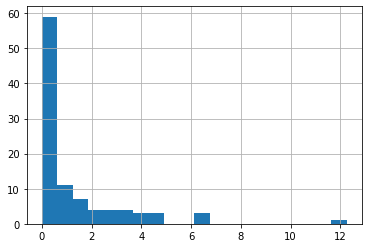

In [38]:
df_new.query('genre == "Shooter"')['sum_sl'].hist(bins=20)

##### действительно есть один выброс на 12 млн. 12/126 = 9,5% всего оборота шутеров приходится на одну игру. Будем считать, что это допустимо

### 4. Составьте портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP):
#### 4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.

##### ТОП-5 платформ в Северной Америке

In [39]:
df_new_na = df_new.groupby('platform')['na_sl'].sum().reset_index().sort_values('na_sl', ascending=False).head()
df_new_na

,platform,na_sl
2,PS4,98.61
5,XOne,81.27
0,3DS,22.64
4,WiiU,19.36
1,PC,7.23


Возьмем суммарные продажи по 5 популярным платформам за 100% и добавим столбец с долями продаж по каждой платформе

In [40]:
df_new_na['ratio'] = df_new_na['na_sl'] / df_new_na['na_sl'].sum() *100
df_new_na

,platform,na_sl,ratio
2,PS4,98.61,43.040461
5,XOne,81.27,35.472044
0,3DS,22.64,9.881716
4,WiiU,19.36,8.450089
1,PC,7.23,3.155689


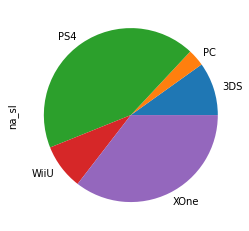

In [41]:
df_new_na.groupby('platform')['na_sl'].sum().plot(kind='pie') #посмотрим на круговую диаграмму

Почти весь рынок Северной Америки представлен 2-мя платформами PS4 и XOne - 78% от всех продаж. Разница между ними - 19%

##### ТОП-5 платформ в Европе

In [42]:
df_new_eu = df_new.groupby('platform')['eu_sl'].sum().reset_index().sort_values('eu_sl', ascending=False).head()
df_new_eu

,platform,eu_sl
2,PS4,130.04
5,XOne,46.25
1,PC,17.97
0,3DS,16.12
4,WiiU,13.15


In [43]:
df_new_eu['ratio'] = df_new_eu['eu_sl'] / df_new_eu['eu_sl'].sum() * 100
df_new_eu

,platform,eu_sl,ratio
2,PS4,130.04,58.175636
5,XOne,46.25,20.690735
1,PC,17.97,8.039189
0,3DS,16.12,7.211560
4,WiiU,13.15,5.882879


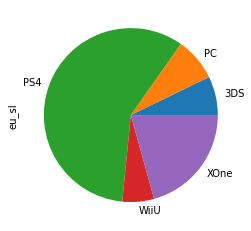

In [44]:
df_new_eu.groupby('platform')['eu_sl'].sum().plot(kind='pie')

Рынок европы также практически полностью принадлежит 2-м приставкам PS4 и XOne - всё теже 78%, но вот разница между ними уже не 11%, как в Америке, а уже 65%, т.е. тотальное доминирование в Европе принадлежит PS4. А вот играть на РС в европе любят больше чем на платформах Nintendo, в отличии от Америки

##### ТОП-5 платформ в Японии

In [45]:
df_new_jp = df_new.groupby('platform')['jp_sl'].sum().reset_index().sort_values('jp_sl', ascending=False).head()
df_new_jp

,platform,jp_sl
0,3DS,44.24
2,PS4,15.02
3,PSV,14.54
4,WiiU,7.31
5,XOne,0.32


In [46]:
df_new_jp['ratio'] = df_new_jp['jp_sl'] / df_new_jp['jp_sl'].sum() *100
df_new_jp

,platform,jp_sl,ratio
0,3DS,44.24,54.328871
2,PS4,15.02,18.445290
3,PSV,14.54,17.855827
4,WiiU,7.31,8.977035
5,XOne,0.32,0.392976


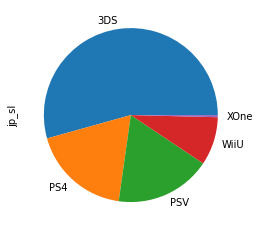

In [47]:
df_new_jp.groupby('platform')['jp_sl'].sum().plot(kind='pie')

В Японии уже обстановка совсем другая, больше половины продаж (54%) приходится на платформу 3DS. И примерно равное кол-во (по 18%) продаж приходится на PS4 и PSV. Любят японцы портативные консоли). XOne в Японии вообще не катируется, что вполене разумно, т.к. Sony и Nintendo это чисто японские консоли с длинной историей и американская XOne не смогла подавить таких динозавров)

#### Определите для пользователя каждого региона (NA, EU, JP)
#### 4.2 Самые популярные жанры (топ-5). Поясните разницу

##### ТОП-5 жанров в Америке:

In [48]:
df_new_na_genre = df_new.groupby('genre')['na_sl'].sum().reset_index().sort_values('na_sl', ascending=False).head()
df_new_na_genre

,genre,na_sl
8,Shooter,66.29
0,Action,60.16
10,Sports,31.96
7,Role-Playing,29.74
2,Fighting,11.23


In [49]:
df_new_na_genre['ratio'] = df_new_na_genre['na_sl'] / df_new_na_genre['na_sl'].sum() * 100
df_new_na_genre

,genre,na_sl,ratio
8,Shooter,66.29,33.248069
0,Action,60.16,30.173538
10,Sports,31.96,16.029692
7,Role-Playing,29.74,14.916240
2,Fighting,11.23,5.632461


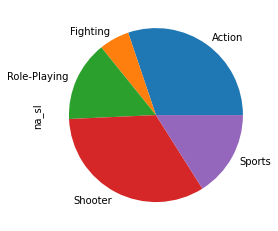

In [50]:
df_new_na_genre.groupby('genre')['na_sl'].sum().plot(kind='pie')

 В Америке 2 самые популярные жанры, это шутеры и экшены - 63% от всех, чуть менее популярны спортивные симуляторы и ролевые игры)

##### ТОП-5 жанров в Европе:

In [51]:
df_new_eu_genre = df_new.groupby('genre')['eu_sl'].sum().reset_index().sort_values('eu_sl', ascending=False).head()
df_new_eu_genre

,genre,eu_sl
0,Action,63.49
8,Shooter,56.23
10,Sports,33.48
7,Role-Playing,25.94
6,Racing,12.92


In [52]:
df_new_eu_genre['ratio'] = df_new_eu_genre['eu_sl'] / df_new_eu_genre['eu_sl'].sum() * 100
df_new_eu_genre

,genre,eu_sl,ratio
0,Action,63.49,33.057378
8,Shooter,56.23,29.277309
10,Sports,33.48,17.432052
7,Role-Playing,25.94,13.506196
6,Racing,12.92,6.727064


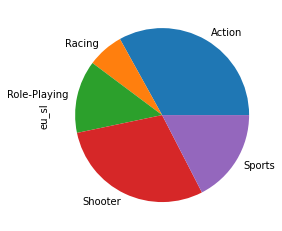

In [53]:
df_new_eu_genre.groupby('genre')['eu_sl'].sum().plot(kind='pie')

В Европе разбивка по жанрам абсолютно аналогична, что и в Америке. Единственная разница, что экшены немного выигрывают у шутеров в Европе, в отличии от Америки.

##### ТОП-5 жанров в Японии:

In [54]:
df_new_jp_genre = df_new.groupby('genre')['jp_sl'].sum().reset_index().sort_values('jp_sl', ascending=False).head()
df_new_jp_genre

,genre,jp_sl
7,Role-Playing,28.70
0,Action,24.71
3,Misc,5.17
2,Fighting,5.01
8,Shooter,4.21


In [55]:
df_new_jp_genre['ratio'] = df_new_jp_genre['jp_sl'] / df_new_jp_genre['jp_sl'].sum() * 100
df_new_jp_genre

,genre,jp_sl,ratio
7,Role-Playing,28.70,42.330383
0,Action,24.71,36.445428
3,Misc,5.17,7.625369
2,Fighting,5.01,7.389381
8,Shooter,4.21,6.209440


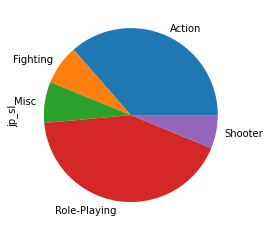

In [56]:
df_new_jp_genre.groupby('genre')['jp_sl'].sum().plot(kind='pie')

В Японии как обычно всё подругому, почти 80% всей прибыли приходится на 2 жанра, ролевые игры (42%) и Экшены (36%)|

#### Вывод: Точно можно сказать, что во всех 3-х регионах любят экшены. В Америке и Европе еще любят шутеры, чего нельзя сказать про Японию, там этот жанр замыкает ТОП-5, тоже самое верно и для жанра Спорт, в Японии его нелюбят совсем, а в Европе и Америке он входит в ТОП-3. Больше всего в Японии любят ролевые игры, а в Америке и Европе они только на 4-й позиции.

#### Определите для пользователя каждого региона (NA, EU, JP)
#### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Рейтинг и продажи в Америке

In [57]:
df_new.groupby('rating')['na_sl'].agg(['sum','count']).reset_index() #гркппировка по рейтингу, выводим сумму и кол-во продаж а америке

,rating,sum,count
0,E,37.65,162
1,E10+,23.53,137
2,M,82.23,212
3,T,32.46,216


1. Посмотрим как на графике соотносятся рейтинги по кол-ву и продажам:

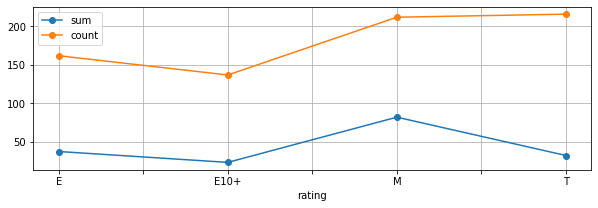

In [58]:
df_new.groupby('rating')['na_sl'].agg(['sum','count']).reset_index().plot(x='rating',
    style='o-', grid=True, figsize=(10, 3))

 В прнципе по графику видно, что чем больше игр, тем больше продаж, не зависимо от рейтинга игры, кроме конечно рейтинга - Т (подростки от 13 до 19 лет). Продажи игр с этим рейтингом явно проседают, учитывая большое кол-во игр. Делаем вывод, что в Америки плохо продаются игры с рейтингом - Т. В играх с другими рейтингами продажи пропорциональны кол-ву новых релизов!

#### Рейтинг и продажи в Европе

In [59]:
df_new.groupby('rating')['eu_sl'].agg(['sum','count']).reset_index()

,rating,sum,count
0,E,45.90,162
1,E10+,17.89,137
2,M,82.38,212
3,T,30.09,216


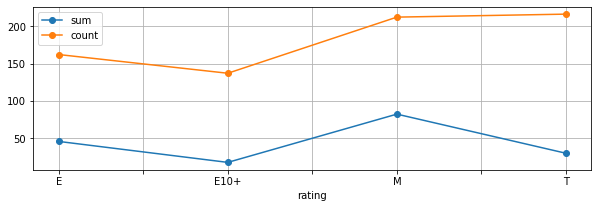

In [60]:
df_new.groupby('rating')['eu_sl'].agg(['sum','count']).reset_index().plot(x='rating',
    style='o-', grid=True, figsize=(10, 3))

1.  Статистика в Европе в который раз копирует статистику в Америке. Здесь также можно говорить о том, что хуже всего продаются игры с рейтингом - Т

#### Рейтинг и продажи в Японии

In [61]:
df_new.groupby('rating')['jp_sl'].agg(['sum','count']).reset_index()

,rating,sum,count
0,E,8.29,162
1,E10+,4.32,137
2,M,6.40,212
3,T,11.99,216


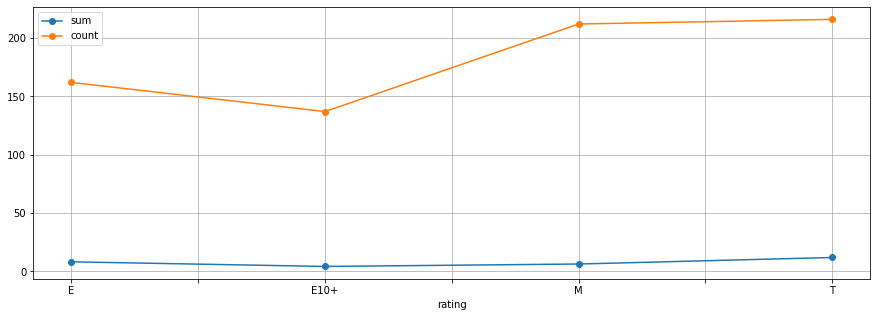

In [62]:
df_new.groupby('rating')['jp_sl'].agg(['sum','count']).reset_index().plot(x='rating',
    style='o-', grid=True, figsize=(15, 5))

1. Япония опять отличается от Америки и Европы. Здесь хуже всего продаются игры с рейтингом - М

### ИТОГО: Портреты геймеров в разных странах выглядят так:

#### Америка: Играют преимущественно на PS4 и XOne (причем одинаково любят обе приставки). Остальные платформы в этом регионе представлены слабо. Играют в основном в шутеры и экшены, также любят спортивные симуляторы. Любят игры всех жанров, кроме рейтинга - Т (игры с ним продаются хуже всех)

#### Европа: Играют преимущественно на PS4. XOne тоже любят, но на 65% меньше чем первую консоль. Остальные платформы в этом регионе представлены слабо. Играют в основном в шутеры и экшены, также любят спортивные симуляторы (всё как и в Америке). Любят игры всех жанров, кроме рейтинга - Т (игры с ним продаются хуже всех)

#### Япония: Играют преимущественно только на 3DS. Также любят PSV и PS4 (вместе они занимают около 40% рынка). Также немного используют Wii. XOne вообще не любят. Играют в основном в ролевые игры (80% от всех жанров). Любят игры всех жанров, кроме рейтинга - M (игры с ним продаются хуже всех)

### 5. Проверьте гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

1. Н0 - пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Н1 - пользовательские рейтинги платформ Xbox One и PC различаются

In [63]:
from scipy import stats as st
import numpy as np

In [64]:
df_user_xone = df_new.query('platform == "XOne"')['user']
df_user_xone.mean()  #среднее значение пользовательской оценки на XOne

47.723684210526315

In [65]:
df_user_xone = df_user_xone.replace(0, df_user_xone.mean()) #заменим нули на среднее значение по платформе

In [66]:
df_user_pc = df_new.query('platform == "PC"')['user']
df_user_pc.mean()  #среднее значение пользовательской оценки на PC

50.88741721854305

In [67]:
df_user_pc = df_user_pc.replace(0, df_user_pc.mean()) #заменим нули на среднее значение по платформе

#### Проверим нашу гипотезу о равенстве с помощью t - теста:

In [68]:
alpha = .05 #возьмем за уровень крит. значимости 5%

In [69]:
results = st.ttest_ind(df_user_pc, df_user_xone)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8737706482566254
Не получилось отвергнуть нулевую гипотезу


#### ОГО! Не знаю, всё ли я правильно сделал, но судя по тесту, 100% вероятности того, что различия в средних оценках получились случайно, следовательно мы не отвергаем гипотезу о равенстве оценок.

#### 5.2 Проверим еще одну гипотезу. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

1. Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые
2. Н1 - Средние пользовательские рейтинги жанров Action и Sports различаются

1. Выделем 2 среза по жанрам и заменим нули в столбце с оценками пользователей на средние значения в жанрах

In [70]:
df_user_action = df_new.query('genre == "Action"')['user']
df_user_action = df_user_action.replace(0, df_user_action.mean())

In [71]:
df_user_sports = df_new.query('genre == "Sports"')['user']
df_user_sports = df_user_sports.replace(0, df_user_sports.mean())

In [72]:
print(df_user_action.mean())
print(df_user_sports.mean())

50.864626058565456
54.6721523668639


#### Проверим нашу гипотезу о равенстве с помощью t - теста:

In [73]:
alpha = 0.1 #возьмем за уровень крит. значимости 10%

results = st.ttest_ind(df_user_action, df_user_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06401014823683185
Отвергаем нулевую гипотезу


#### Я взял за крит. уровень стат значимости 10%, т.е. pvalue менее 10% мне будет достаточно чтобы отвергнуть гипотезу о равенстве. t-test показал, что вероятность получить разницу в оценках случайно = 6%, что меньше моего порога, а следователно, я отвергаю гипотезу о равенстве в пользу гипотезы о различии

## ВЫВОД:

### Для своей рекламной кампании на следующий год я бы сделал следующее:

#### Кампания в Америке:
1. Акцент на игры для платформ PS4 и XOne, бюджет по 40% на каждую платформу. И 20% на Wii, Pc, 3DS
2. 70% бюджета на рекламу игр в жанре Shooter и Action и еще по 15% на ролевые игры и спортивные симуляторы
3. Исключаем игры с Т-рейтингом
#### Кампания в Европе:
1. Акцент на игры для платформ PS4 - 70% бюджета. 15% - на XOne и 15% на Wii, Pc, 3DS
2. 70% бюджета на рекламу игр в жанре Shooter и Action и еще по 15% на ролевые игры и спортивные симуляторы. 
3. Исключаем игры с Т-рейтингом
#### Кампания в Японии:
1. Акцент на игры для платформ 3DS - 60% бюджета. 15% - на PS4, 15% - на PSV и 10% на Wii
2. 40% бюджета на рекламу игр в жанре Role-Playing и 40% - на Action и еще по 10% на шутеры и файтинги :). 
3. Исключаем игры с М-рейтингом